In [1]:
from dcfs_geodb import GeoDB
from dcfs_geodb import PG_DEFAULT_CONNECTION_PARAMETERS
import numpy as np

__Step open connection__:

In [2]:
PG_DEFAULT_CONNECTION_PARAMETERS['password'] = "Oeckel6b&z"
geodb = GeoDB(con=PG_DEFAULT_CONNECTION_PARAMETERS)

__Step create dummy dataset with mean and standard deviation from full land use dataset__

In [3]:
gdf = geodb.load_from_land_use(where='TRUE')
gdf['mean'] = np.random.normal(size=gdf.shape[0])
gdf['std'] = np.abs(gdf['mean'] * np.random.normal(0, 0.2, size=gdf.shape[0]))
# Set foreign key to land use table
gdf['land_use_id'] = gdf['id']
gdf


,id,raba_pid,raba_id,d_od,geometry,mean,std,land_use_id
0,415171,4770326.0,1410,2019-03-26,"POLYGON ((453952.629 91124.177, 453952.696 911...",0.451869,0.032013,415171
1,424481,6155275.0,7000,2019-02-20,"POLYGON ((460053.293 93995.40300000001, 460057...",1.782782,0.512110,424481
2,424739,6216979.0,1100,2019-01-11,"POLYGON ((457450.637 93937.34, 457572.569 9398...",-0.355657,0.013909,424739
3,424437,6151533.0,1300,2019-04-12,"POLYGON ((459500 99149.25, 459500 99178.836, 4...",-0.724003,0.077607,424437
4,424438,6153638.0,1321,2019-01-05,"POLYGON ((454949.478 95074.382, 454955.102 950...",1.236925,0.124566,424438
...,...,...,...,...,...,...,...,...
9822,424993,6253989.0,1600,2019-03-08,"POLYGON ((460637.334 96865.891, 460647.927 969...",-0.025297,0.007982,424993
9823,424994,6252044.0,1600,2019-03-26,"POLYGON ((459467.868 96839.686, 459467.77 9686...",2.018659,0.060586,424994
9824,424995,6245985.0,2000,2019-04-08,"POLYGON ((459488.998 94066.24800000001, 459498...",-1.298945,0.201219,424995
9825,424996,6245986.0,2000,2019-02-20,"POLYGON ((459676.68 94000, 459672.469 93981.44...",0.139637,0.013811,424996


__Step delete aggregation table 'tesÄ' if itz exists__

In [4]:
geodb.drop_agg('test')

__Step writing data to a aggregation table__

In [5]:
geodb.write_agg(variable='test', data_source=gdf)

__step loading the data from teh aggregation table__

In [6]:
gdf = geodb.load_agg(variable='test')
gdf

,id,mean,std,raba_pid,raba_id,d_od,geometry
0,424437,-0.724003,0.077607,6151533.0,1300,2019-04-12,"POLYGON ((459500 99149.25, 459500 99178.836, 4..."
1,424439,0.417533,0.036371,6158376.0,1100,2019-01-23,"POLYGON ((461921.055 93631.01700000001, 461922..."
2,415172,0.505782,0.056545,4770325.0,1300,2019-03-26,"POLYGON ((453810.376 91150.19899999999, 453812..."
3,415173,0.480631,0.018793,2305689.0,7000,2019-02-25,"POLYGON ((456099.635 97696.07000000001, 456112..."
4,415174,-1.134154,0.145469,2305596.0,1100,2019-02-25,"POLYGON ((455929.405 97963.785, 455933.284 979..."
...,...,...,...,...,...,...,...
9822,424984,0.865173,0.024386,6267379.0,1500,2019-03-04,"POLYGON ((459388.687 97005.82799999999, 459391..."
9823,424989,-0.617130,0.093936,6262717.0,1500,2019-01-05,"POLYGON ((458314.21 97012.77099999999, 458324...."
9824,424994,2.018659,0.060586,6252044.0,1600,2019-03-26,"POLYGON ((459467.868 96839.686, 459467.77 9686..."
9825,424995,-1.298945,0.201219,6245985.0,2000,2019-04-08,"POLYGON ((459488.998 94066.24800000001, 459498..."


__Step plotting the full result__

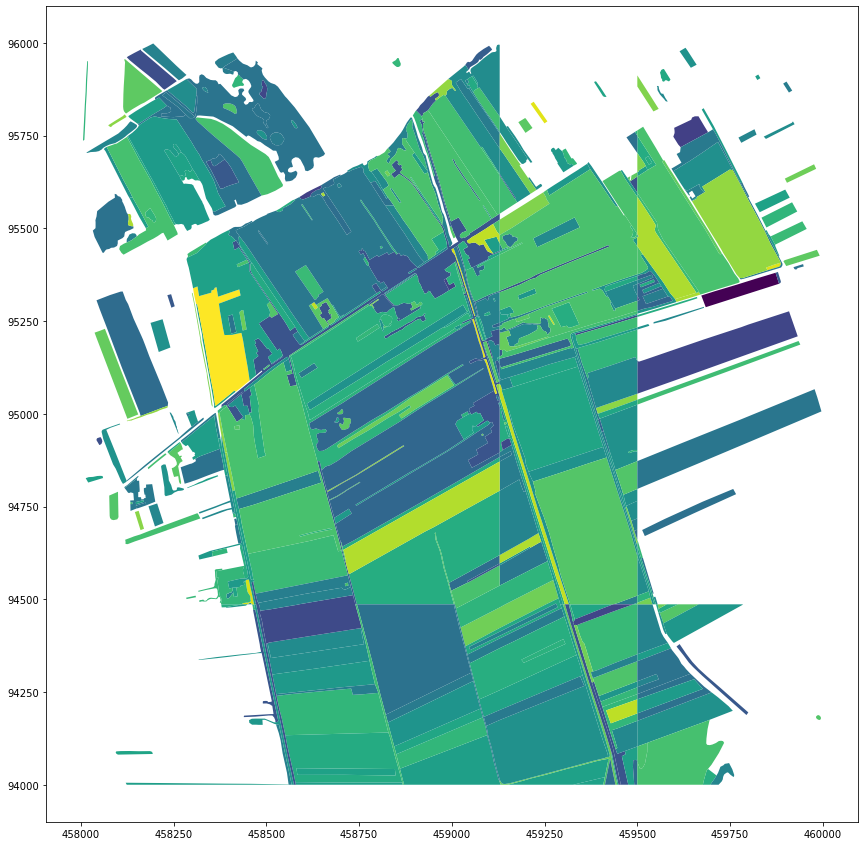

In [11]:
gdf.plot(column='mean', figsize=(15,15))

__Step querying the result__

In [8]:
gdf = geodb.query_by_bbox(458000.0, 94000.0, 460000.0, 96000.0, variable='test')
gdf

,id,raba_id,d_od,geometry,raba_pid,id,mean,fk_land_use_id,std
0,415176,1500,2019-01-05,"POLYGON ((458139.092 95583.227, 458136.249 955...",3602865.0,493797,-0.211197,415176,0.087486
1,415177,1500,2019-01-05,"POLYGON ((458123.067 95461.89200000001, 458123...",3602883.0,493798,-0.651737,415177,0.025613
2,424442,1100,2019-03-11,"POLYGON ((459552.298 94192.227, 459700.248 942...",6163531.0,493802,-0.299503,424442,0.020836
3,424444,1321,2019-04-08,"POLYGON ((459165.989 94003.878, 459191.169 940...",6171221.0,493804,0.122380,424444,0.008910
4,415222,1100,2019-01-05,"POLYGON ((458191.097 95805.16800000001, 458153...",2309384.0,493871,0.078643,415222,0.005209
...,...,...,...,...,...,...,...,...,...
470,424767,1321,2019-03-11,"POLYGON ((459719.109 94000, 459696.699 94000, ...",6219929.0,503455,-0.591211,424767,0.017326
471,424809,1410,2019-03-26,"POLYGON ((459334.539 95155.41499999999, 459335...",6218014.0,503486,-0.361879,424809,0.149888
472,424886,1321,2019-04-08,"POLYGON ((459374.625 94303.18799999999, 459380...",6261370.0,503550,-0.674099,424886,0.244295
473,424995,2000,2019-04-08,"POLYGON ((459488.998 94066.24800000001, 459498...",6245985.0,503611,-1.298945,424995,0.201219


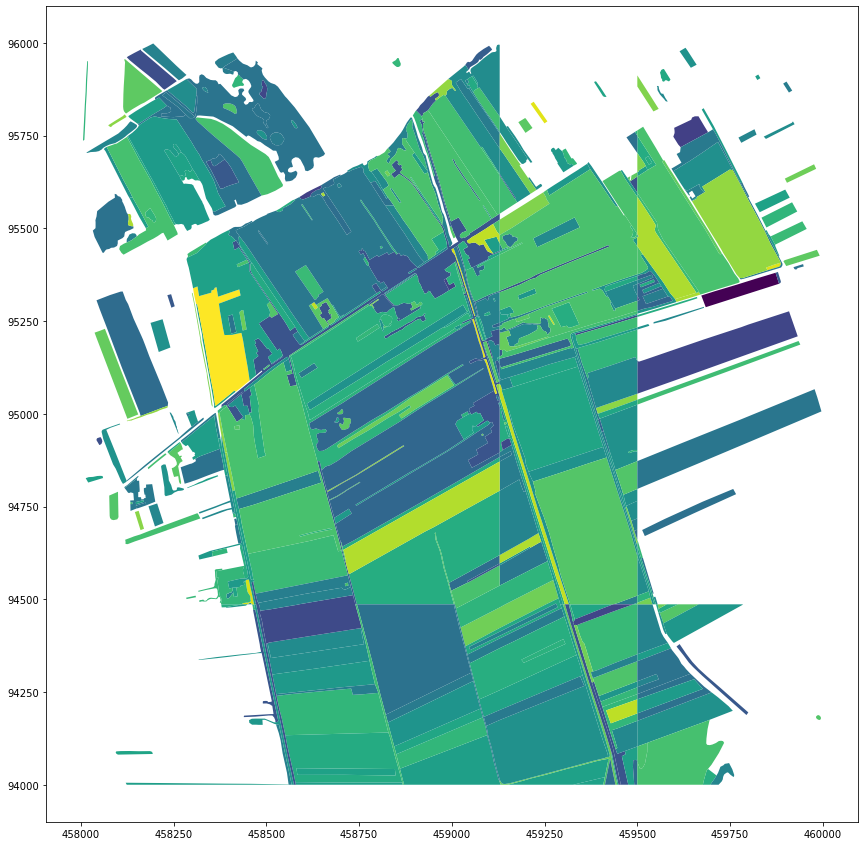

In [9]:
gdf.plot(column='mean', figsize=(15,15))

In [10]:
geodb.drop_agg(variable='test')